# 图生图-ControlNet-Pose

同济子豪兄 2023-6-13

https://github.com/open-mmlab/mmagic/tree/main/configs/controlnet

## 进入 MMagic 主目录

In [1]:
import os
os.chdir('mmagic')

## 导入工具包

In [2]:
import mmcv
from mmengine import Config
from PIL import Image

from mmagic.registry import MODELS
from mmagic.utils import register_all_modules

register_all_modules()

2023-06-14 10:40:50.849212: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-14 10:40:51.580613: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /environment/miniconda3/lib/python3.8/site-packages/cv2/../../lib64:
2023-06-14 10:40:51.580707: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /environment/miniconda3/lib/python3.8/site-packages/cv2/../..

## 载入ControlNet模型

In [3]:
cfg = Config.fromfile('configs/controlnet/controlnet-pose.py')
# convert ControlNet's weight from SD-v1.5 to Counterfeit-v2.5
cfg.model.unet.from_pretrained = 'gsdf/Counterfeit-V2.5'
cfg.model.vae.from_pretrained = 'gsdf/Counterfeit-V2.5'
cfg.model.init_cfg['type'] = 'convert_from_unet'
controlnet = MODELS.build(cfg.model).cuda()
# call init_weights manually to convert weight
controlnet.init_weights()

06/14 10:40:53 - mmengine - INFO - Set model dtype to 'torch.float32'.
06/14 10:40:58 - mmengine - INFO - Creating runwayml/stable-diffusion-v1-5 by 'HuggingFace'
Do not support Xformers. Please install Xformers first. The program will run without Xformers.
06/14 10:40:59 - mmengine - INFO - Set model dtype to 'torch.float32'.
Do not support Xformers. Please install Xformers first. The program will run without Xformers.
06/14 10:41:05 - mmengine - INFO - Start convert ControlNet to new Unet.
06/14 10:41:05 - mmengine - INFO - Convert success: 'model.conv_in.weight'.
06/14 10:41:05 - mmengine - INFO - Convert success: 'model.conv_in.bias'.
06/14 10:41:05 - mmengine - INFO - Convert success: 'model.time_embedding.linear_1.weight'.
06/14 10:41:05 - mmengine - INFO - Convert success: 'model.time_embedding.linear_1.bias'.
06/14 10:41:05 - mmengine - INFO - Convert success: 'model.time_embedding.linear_2.weight'.
06/14 10:41:05 - mmengine - INFO - Convert success: 'model.time_embedding.linea

## 咒语Prompt

In [4]:
prompt = 'masterpiece, best quality, sky, black hair, skirt, sailor collar, looking at viewer, short hair, building, bangs, neckerchief, long sleeves, cloudy sky, power lines, shirt, cityscape, pleated skirt, scenery, blunt bangs, city, night, black sailor collar, closed mouth'


## 输入Pose图

In [5]:
control_url = 'https://user-images.githubusercontent.com/28132635/230380893-2eae68af-d610-4f7f-aa68-c2f22c2abf7e.png'
control_img = mmcv.imread(control_url)
control = Image.fromarray(control_img)
control.save('control.png')

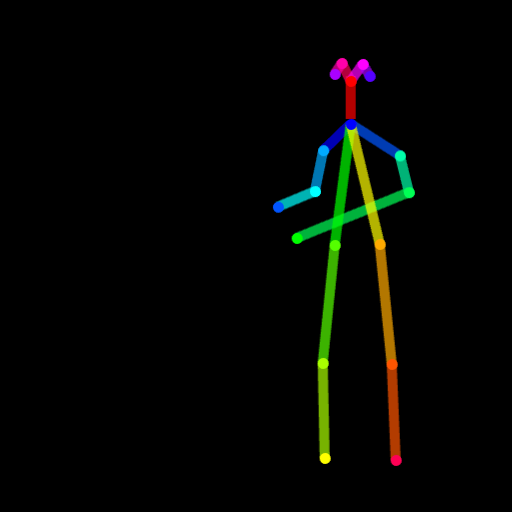

In [6]:
control

## 执行预测

In [9]:
output_dict = controlnet.infer(prompt, control=control, width=512, height=512, guidance_scale=7.5)
samples = output_dict['samples']
for idx, sample in enumerate(samples):
    sample.save(f'sample_{idx}.png')
controls = output_dict['controls']
for idx, control in enumerate(controls):
    control.save(f'control_{idx}.png')

100%|██████████| 20/20 [00:01<00:00, 10.49it/s]
